In [1]:
from qiskit_experiments.library import ResonatorSpectroscopy

In [15]:
from qiskit.providers.fake_provider import FakeArmonk, FakeManila
from qiskit_aer import AerSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
import numpy as np

# Create a pure relaxation noise model for AerSimulator
pulse_model = PulseSystemModel.from_backend(backend=FakeArmonk())

backend = AerSimulator.from_backend(FakeArmonk())

In [16]:
defaults = FakeArmonk().defaults()

print(backend.configuration().open_pulse)

True


In [17]:
import numpy as np

# unit conversion factors -> all backend properties returned in SI 
# (Hz, sec, etc)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
kHz = 1.0e3
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds

frequency_span_Hz = 320 * kHz
frequency_step_Hz = 8 * kHz
center_frequency_Hz = defaults.meas_freq_est[0]
print(f"Qubit {0} has an estimated readout frequency of {center_frequency_Hz / GHz} GHz.")
frequency_min = center_frequency_Hz - frequency_span_Hz / 2
frequency_max = center_frequency_Hz + frequency_span_Hz / 2
frequencies_GHz = np.arange(frequency_min / GHz, 
                            frequency_max / GHz, 
                            frequency_step_Hz / GHz)
print(f"The sweep will go from {frequency_min / GHz} GHz to {frequency_max / GHz} GHz\
      in steps of {frequency_step_Hz / MHz} MHz.")

Qubit 0 has an estimated readout frequency of 6.993370669000001 GHz.
The sweep will go from 6.993210669000001 GHz to 6.993530669000001 GHz      in steps of 0.008 MHz.


In [18]:
frequencies_Hz = frequencies_GHz * GHz

exp = ResonatorSpectroscopy(physical_qubits=(0,), frequencies=frequencies_Hz, absolute=False)

In [10]:
#exp.circuits()[0].draw(output='mpl')
#exp.circuits()

In [19]:
exp_data = exp.run(backend=backend).block_for_results()

QiskitError: 'Cannot retrieve default measurement frequencies from backend. Please set frequencies explicitly or set `absolute` to `False`.'

In [10]:
print(exp_data.job_status())
print(exp_data.analysis_status())

JobStatus.DONE
AnalysisStatus.DONE


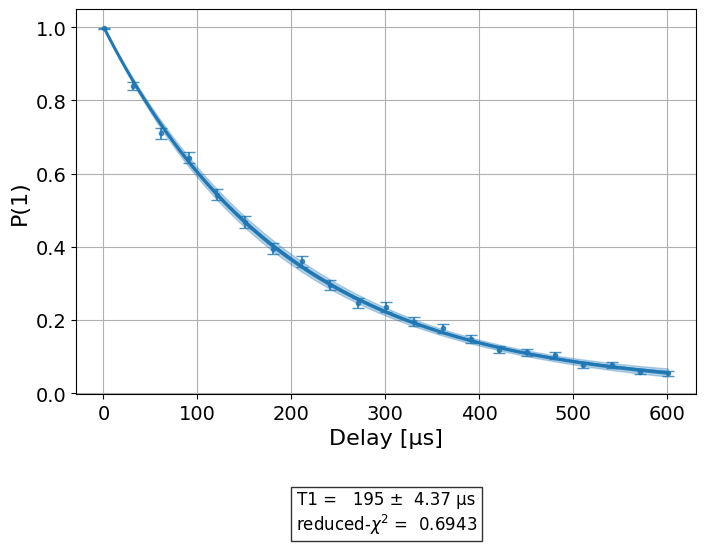

In [11]:
display(exp_data.figure(0))